In [ ]:
# Description: This program classifies a person as having a cardiovascular disease or not

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Import the data file from Kaggle, the link;
# https://www.kaggle.com/sulianova/cardiovascular-disease-dataset/data
# Import Google Drive (data is too large to upload the file itself)
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [5]:
# Load cardio_train data file from the drive 
upload = r'/content/drive/My Drive/Colab Notebooks/cardio_train.csv'

In [6]:
# Store the data into a variable 
df = pd.read_csv(upload, sep=';')

# Print the data
df.head(7)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0


In [7]:
# Get the shape of the data
df.shape
# 70,000 individuals with 13 indentifying features

(70000, 13)

In [8]:
# Count the empty/null values in each column in the data set
print(df.isna().sum())
print()
# Another way to check for any null or missing values
print(df.isnull().values.any())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

False


In [9]:
# View some basic statistics on the data set
df.describe()
# Age is listed in years

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Get a count with or without cardiovascular disease 
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

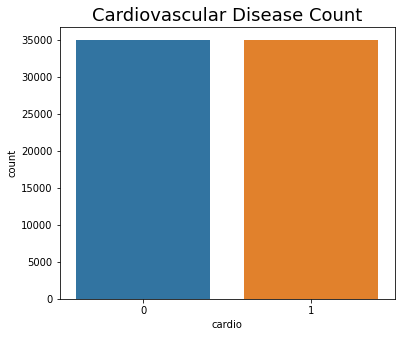

In [12]:
# Visualize the count
plt.figure(figsize=(6,5))
plt.title('Cardiovascular Disease Count', fontsize=18)
sns.countplot(df['cardio'])
# 0 is does not have, 1 does have

In [32]:
# Get percentage for model to beat
print('The number of individuals to have cardiovascular disease',(34979/(35021+34979))*100,'%')
print('The number of individuals who do not have cardiovascular disease',(35021/(35021+34979))*100,'%')

The number of individuals to have cardiovascular disease 49.97 %
The number of individuals who do not have cardiovascular disease 50.029999999999994 %


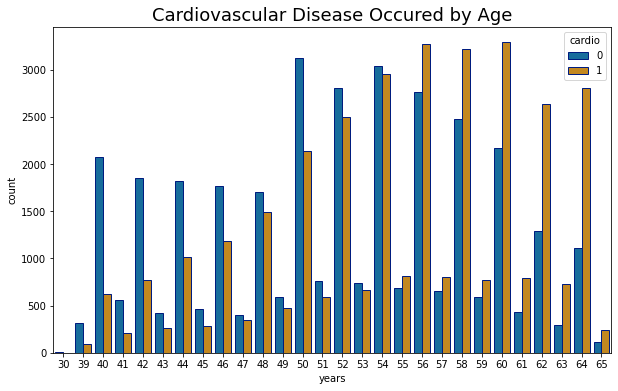

In [13]:
# Look at the number of people with a cardiovascular disease that exceed the number of people without a cardiovascular disease
# We will do this by looking at age

# Create a years column
df['years'] = (df['age'] / 365).round(0)
df['years'] = pd.to_numeric( df['years'], downcast = 'integer')

# Visualize the data
plt.figure(figsize=(10,6))
plt.title('Cardiovascular Disease Occured by Age',fontsize=18)
sns.countplot(x='years', hue='cardio', data=df, palette='colorblind', edgecolor=sns.color_palette('dark', n_colors=1))

In [14]:
# Get the correlation of the columns
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


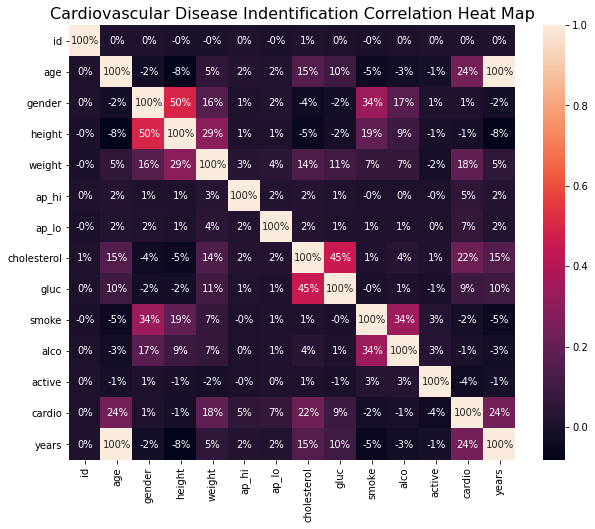

In [17]:
# Visualize the data 
plt.figure(figsize=(10,8))
plt.title('Cardiovascular Disease Indentification Correlation Heat Map',fontsize=16)
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [18]:
# Remove or drop the years column
df = df.drop('years', axis=1)

In [19]:
# Remove or drop the id column
df = df.drop('id', axis=1)

In [20]:
# Split the data into the independent/feature data set, x, and the dependent/target data set, y
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [21]:
# Split the data again, into 75% training set and 25% testing data set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25, random_state=1)

In [22]:
# Feature Scaling
# Scale the values in the data to be values between 0 and 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
# Create a function for the models
def models(X_train, Y_train):

  # Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train, Y_train)

  # Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(X_train, Y_train)

  # XGBClassifier
  # This model is based of the decision tree - speed and performance in mind
  from xgboost import XGBClassifier
  xgbc = XGBClassifier().fit(X_train, Y_train)

  # Random Forrest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=0)
  forest.fit(X_train, Y_train)

  # Print the model's accuracy on the training data
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[2]XGBClassifier Training Accuracy:', xgbc.score(X_train, Y_train))
  print('[3]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))

  return log, tree, forest, xgbc

In [34]:
# Test all of the model's accuracy on the training data set
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy: 0.7226476190476191
[1]Decision Tree Classifier Training Accuracy: 0.9998095238095238
[2]XGBClassifier Training Accuracy: 0.7385333333333334
[3]Random Forest Classifier Training Accuracy: 0.9793333333333333


In [35]:
# Test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
  print('Model ', i)
  cm = confusion_matrix(Y_test, model[0].predict(X_test))
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  # Print the confusion matrix
  print(cm)
  # Print the models accuracy on the test data
  print('Cardiovascular Disease Prediction Model',i,'Test Accuracy:', (TP + TN)/ (TP + TN + FN + FP))
  print()

Model  0
[[6626 1983]
 [2923 5968]]
Cardiovascular Disease Prediction Model 0 Test Accuracy: 0.7196571428571429

Model  1
[[6626 1983]
 [2923 5968]]
Cardiovascular Disease Prediction Model 1 Test Accuracy: 0.7196571428571429

Model  2
[[6626 1983]
 [2923 5968]]
Cardiovascular Disease Prediction Model 2 Test Accuracy: 0.7196571428571429

Model  3
[[6626 1983]
 [2923 5968]]
Cardiovascular Disease Prediction Model 3 Test Accuracy: 0.7196571428571429



In [36]:
# Another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print('Cardiovascular Disease Prediction Test Results')
for i in range( len(model) ):
  print()
  print('Model ', i)
  print( classification_report(Y_test, model[i].predict(X_test)))
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()

Cardiovascular Disease Prediction Test Results

Model  0
              precision    recall  f1-score   support

           0       0.69      0.77      0.73      8609
           1       0.75      0.67      0.71      8891

    accuracy                           0.72     17500
   macro avg       0.72      0.72      0.72     17500
weighted avg       0.72      0.72      0.72     17500

0.7196571428571429


Model  1
              precision    recall  f1-score   support

           0       0.63      0.64      0.63      8609
           1       0.64      0.64      0.64      8891

    accuracy                           0.64     17500
   macro avg       0.64      0.64      0.64     17500
weighted avg       0.64      0.64      0.64     17500

0.6357142857142857


Model  2
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      8609
           1       0.73      0.65      0.68      8891

    accuracy                           0.70     17500
   macro av

In [37]:
# Print the prediction of Random Forest Classifier Model
pred = model[3].predict(X_test)
print(pred)
print()
print(Y_test)

[1 0 1 ... 1 1 0]

[1 1 1 ... 1 1 0]


In [43]:
# Conclusion
print('Even though the prediction results for the Random Forest Classifier Model only\ngave 73.75% accuracy, this is still',73.75-49.97,'% better than just simply guessing.')

Even though the prediction results for the Random Forest Classifier Model only
gave 73.75% accuracy, this is still 23.78 % better than just simply guessing.
